In [1]:
!pwd
!which python

import sys, os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../../bem/')    # add path of package "bem" to search list.

/home/wwc/bem_log/electrode/examples
/home/wwc/anaconda3/envs/ele35/bin/python


In [2]:
from electrode import System, GridElectrode

# load the bem electrostatics results into a electrode.System()
s = System()
for name in "DC1 DC2 DC3 DC4 DC5 RF".split(): 
    e = GridElectrode.from_vtk("../../bem/examples/SimpleTrap/SimpleTrap_"+name+".vtk", 
                               maxderiv=4)    # read vtk of each electrode
    e.name = name
    s.append(e)
e.name, e.dc, e.rf, len(e.data), e.data[0].shape

('RF', 0.0, 0.0, 4, (20, 20, 20, 1))

In [3]:
from scipy.constants import atomic_mass
s["RF"].rf = 50.
s["DC1"].dc = 8.
s["DC4"].dc = 8.
s["DC5"].dc = 2.
xi = (0., 0.5, 1.5)
x0 = s.minimum(xi)
print("offset: %s\n"%(x0-xi))
# analyze_static(x, axis=(0, 1, 2), m=ct.atomic_mass, q=ct.elementary_charge, 
#          l=100e-6, o=2*np.pi*1e6, ions=1, log=None)
for line in s.analyze_static(x0, m=25*atomic_mass, l=40e-6, o=100e6*2*np.pi):
    print(line)

offset: [ 0.0023802  -0.39883259 -0.60252369]

parameters:
 f=100 MHz, m=25 amu, q=1 qe, l=40 µm, scale=0.0391 V'/V_SI
corrdinates:
 analyze point: [ 0.0023802   0.10116741  0.89747631]
               ([  0.09520797   4.04669642  35.89905244] µm)
 minimum is at offset: [ -7.42622532e-09   1.57042588e-06  -4.35657663e-07]
                      ([ -2.97049013e-07   6.28170354e-05  -1.74263065e-05] µm)
potential:
 dc electrical: 1.4 eV
 rf pseudo: 0.00011 eV
 saddle offset: [  2.15597029e-02   5.22634804e-05  -1.34481991e-05]
               ([  8.62388115e-01   2.09053922e-03  -5.37927962e-04] µm)
 saddle height: -1.5e-05 eV
force:
 dc electrical: [ 0.00045812 -0.18794348  0.29008193] eV/l
               ([   11.45304834 -4698.58708544  7252.04813483] eV/m)
 rf pseudo: [-0.00040699  0.17713158 -0.28708256] eV/l
           ([  -10.17486597  4428.28951334 -7177.06388394] eV/m)
modes:
 pp+dc normal curvatures: [  3.06668622e-01   7.14236665e+02   7.16378390e+02]
 motion is bounded: False
 ps

max, min potential: 571.071764, 1.489103
max, min potential: 571.412072, 154.400389
Have taken another levels upper limit. Use a smaller divide_max.


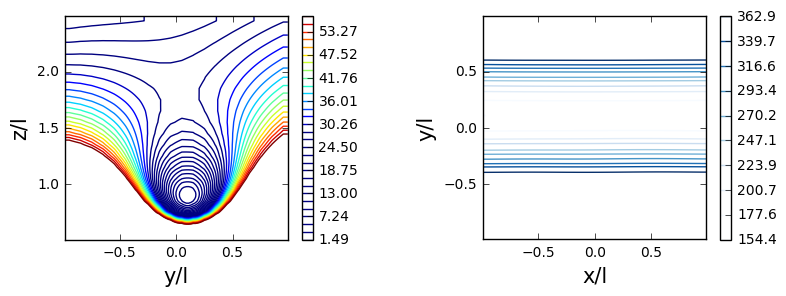

In [4]:
from electrode import Grid

origin, step, shape = s["DC1"].origin,s["DC1"].spacing,s["DC1"].data[0].shape[:-1]
center = origin + (np.array(shape)-1)*step/2
grid = Grid(center=center, step=np.array(step)/5, shape=np.array(shape)*5)  # 5 times denser than original grid.
fig, ax = plt.subplots(1,2,gridspec_kw={'wspace':0.5},figsize=(9,9),dpi=100)
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
CS1 = s.plot_contour(ax[0],grid=grid,slc='x',slc_at=0,fill=False,divide_max=10,line_num=30)[0] # cmap=plt.cm.Blues
CS2 = s.plot_contour(ax[1],grid=grid,slc='z',slc_at=0,divide_max=10,line_num=10, cmap=plt.cm.Blues)[0]
cb1, cb2 = fig.colorbar(CS1,ax=ax[0],shrink=0.32), fig.colorbar(CS2,ax=ax[1],shrink=0.32)

In [5]:
# This is from electrode turtorial.ipynb
# import scipy.constants as ct
# l = 30e-6 # µm length scale
# u = 20. # V rf peak voltage
# m = 25*ct.atomic_mass # ion mass
# q = 1*ct.elementary_charge # ion charge
# o = 2*np.pi*100e6 # rf frequency in rad/s
# s["RF"].rf = u*np.sqrt(q/m)/(2*l*o)
# print(s["RF"])

# x0 = s.minimum((0, 0, 1.), axis=(1, 2))

# for line in s.analyze_static(x0, axis=(1,0), m=m, q=q, l=l, o=o):
#     print(line)